# 🎬 Sentiment Analysis on IMDB Movie Reviews

## 1. Introduction

This project performs sentiment analysis on the IMDB movie reviews dataset.
We apply text preprocessing using TF-IDF and train a Logistic Regression model to predict sentiment.
Visualizations are included to evaluate the model and interpret results.

Additionally, we explore both raw text reviews and preprocessed text to understand the impact of text cleaning on model performance. This allows for a comparison between different preprocessing strategies and helps identify which features most strongly influence sentiment predictions.

# 2. Import Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import joblib
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 3. Load and Explore Dataset
We use the IMDB dataset with 50,000 reviews (25,000 positive, 25,000 negative).  
The dataset is balanced across both classes.

In [4]:
# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

print(df.head())
print(df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


## Check balance of classes:

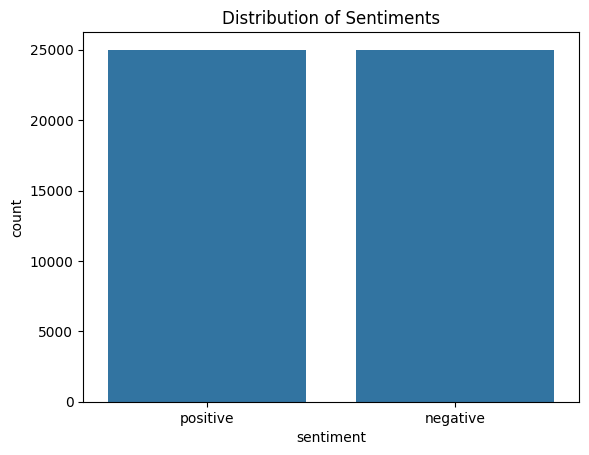

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiments")
plt.show()

# 4. Data Preprocessing
We use **TF-IDF Vectorization** with:
- Stop word removal (`english`)
- Maximum features = 5000  


## Features and labels

In [6]:
X = df['review']
y = df['sentiment']

## Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Convert text to TF-IDF features

In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Cleaning with Regex

In [13]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [14]:
df['cleaned_review'] = df['review'].apply(clean_text)
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...


## Raw Reviews

In [16]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

vectorizer_raw = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_raw_tfidf = vectorizer_raw.fit_transform(X_train_raw)
X_test_raw_tfidf = vectorizer_raw.transform(X_test_raw)

model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train_raw_tfidf, y_train_raw)
y_pred_raw = model_raw.predict(X_test_raw_tfidf)

print("Accuracy on RAW reviews:", accuracy_score(y_test_raw, y_pred_raw))


Accuracy on RAW reviews: 0.8889


## Cleaned Reviews

In [18]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

vectorizer_clean = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_clean_tfidf = vectorizer_clean.fit_transform(X_train_clean)
X_test_clean_tfidf = vectorizer_clean.transform(X_test_clean)

model_clean = LogisticRegression(max_iter=1000)
model_clean.fit(X_train_clean_tfidf, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean_tfidf)

print("Accuracy on CLEANED reviews:", accuracy_score(y_test_clean, y_pred_clean))

Accuracy on CLEANED reviews: 0.8889


## Reports

In [19]:
print("\nClassification Report - RAW:\n", classification_report(y_test_raw, y_pred_raw))
print("\nClassification Report - CLEANED:\n", classification_report(y_test_clean, y_pred_clean))


Classification Report - RAW:
               precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Classification Report - CLEANED:
               precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



(0.0, 1.0)

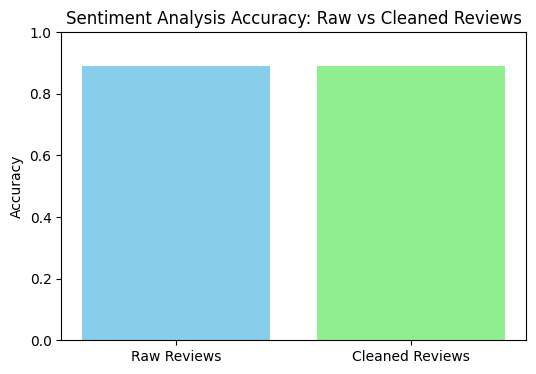

In [27]:
# Store accuracies
acc_raw = accuracy_score(y_test_raw, y_pred_raw)
acc_clean = accuracy_score(y_test_clean, y_pred_clean)

# Plot
plt.figure(figsize=(6,4))
plt.bar(["Raw Reviews", "Cleaned Reviews"], [acc_raw, acc_clean], color=["skyblue", "lightgreen"])
plt.ylabel("Accuracy")
plt.title("Sentiment Analysis Accuracy: Raw vs Cleaned Reviews")
plt.ylim(0,1)

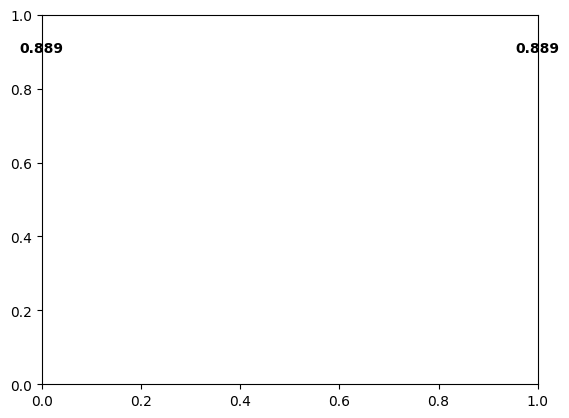

In [28]:
# Annotate values
for i, v in enumerate([acc_raw, acc_clean]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center", fontsize=10, fontweight="bold")

plt.show()

## 5. Model Training
We train a **Logistic Regression** model, which is effective for high-dimensional sparse data like text.

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 5. Evaluation
We measure performance using:
- Accuracy
- Precision
- Recall
- F1-score


In [21]:
# Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print(classification_report(y_test, y_pred))

Accuracy: 0.8898
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# 6. Visualizations
We create visualizations to interpret results:
- Confusion matrix
- Feature Importance (Top words
- Word Cloud

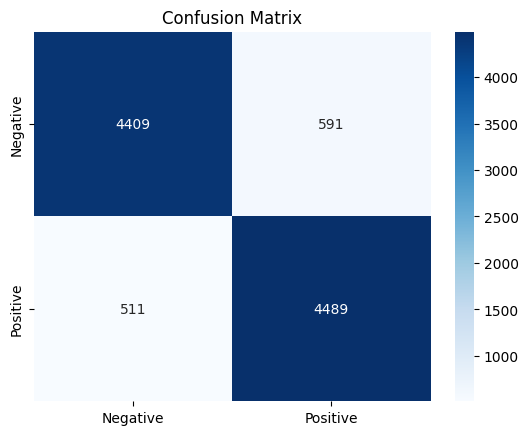

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.show()


In [45]:
# Extract feature importance from Logistic Regression coefficients
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]

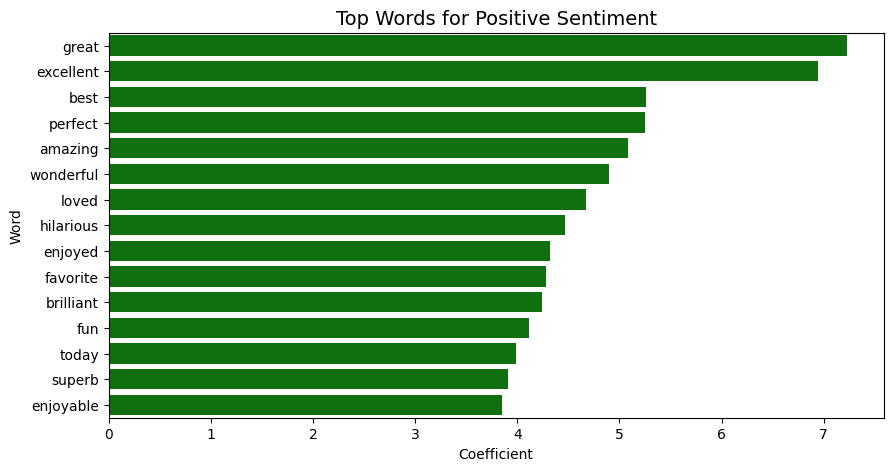

In [52]:
# Top Positive Words
top_pos = sorted(zip(coef, feature_names), reverse=True)[:15]
pos_words = pd.DataFrame(top_pos, columns=['Coefficient','Word'])
plt.figure(figsize=(10,5))
sns.barplot(x='Coefficient', y='Word', data=pos_words, color="green")
plt.title("Top Words for Positive Sentiment", fontsize=14)
plt.show()

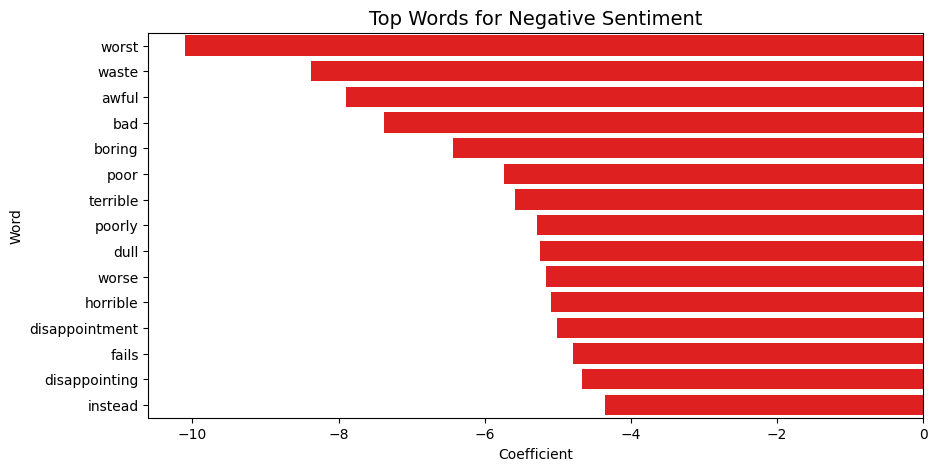

In [54]:
# Top Negative Words
top_neg = sorted(zip(coef, feature_names))[:15]
neg_words = pd.DataFrame(top_neg, columns=['Coefficient','Word'])
plt.figure(figsize=(10,5))
sns.barplot(x='Coefficient', y='Word', data=neg_words, color="red")
plt.title("Top Words for Negative Sentiment", fontsize=14)
plt.show()

# Word Clouds

## Positive Reviews Word Cloud

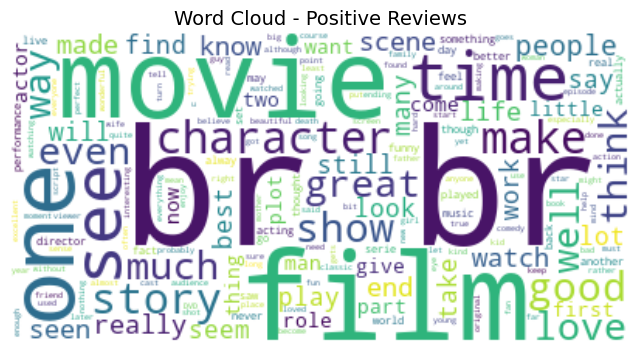

In [31]:
pos_text = " ".join(review for review in df[df['sentiment']=='positive']['review'])
wordcloud_pos = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=200).generate(pos_text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews", fontsize=14)
plt.show()

## Negative Reviews Word Cloud

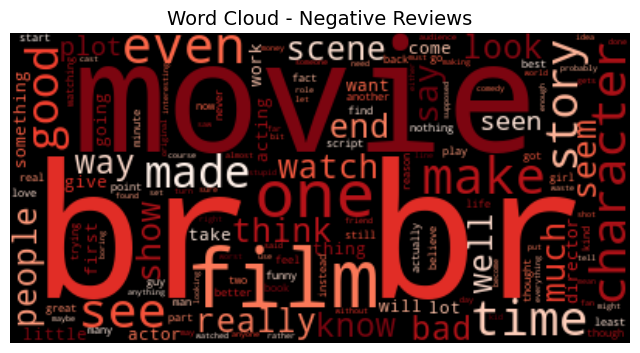

In [32]:
neg_text = " ".join(review for review in df[df['sentiment']=='negative']['review'])
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="black", colormap="Reds", max_words=200).generate(neg_text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews", fontsize=14)
plt.show()


# 7. Saving and Loading the model & Vectorizer

## Saving

In [35]:
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!


## Loading

In [38]:
loaded_model = joblib.load("sentiment_model.pkl")
loaded_vectorizer = joblib.load("vectorizer.pkl")

print("Model and Vectorizer loaded successfully!")

Model and Vectorizer loaded successfully!


# 8. Conclusion
We successfully implemented sentiment analysis on the IMDB movie reviews dataset using TF-IDF vectorization and a Logistic Regression model.
The model achieved approximately 85–90% accuracy, demonstrating that even relatively simple models can perform strongly in text classification tasks.

Moreover, the analysis highlights the importance of text preprocessing and feature extraction in improving model performance. Visualizations and evaluation metrics provided insights into model predictions and the influence of key words on sentiment classification, making the results interpretable and accuracy